In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

print(df.head())

# Mostra um resumo de informações
print(df.info())

# Mostra estatisticas das colunas
print(df.describe())

# Conta quantas vezes cada valor aparece na coluna
print(df['Sex'].value_counts())

# Conta quantas pessoas embarcaram em cada ponto
print(df['Embarked'].value_counts())

# Conta o numero de celulas vazias em cada coluna
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171     7.25   NaN        S  
1      0          PC 17599  712.833   C85        C  
2      0  STON/O2. 3101282    7.925   NaN        S  
3      0            113803     53.1  C123        S  
4      0            373450    08.05   NaN        S  
<c

In [2]:
#2
df = df.drop_duplicates()
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
df['Survived'] = df['Survived'].astype(bool)
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


C:\Users\08238\AppData\Local\Temp\ipykernel_11592\822137275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)
C:\Users\08238\AppData\Local\Temp\ipykernel_11592\822137275.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [3]:
#3
def categorize_age (age):
    if age < 18: return 'Criança'
    elif age < 60: return 'Adulto'
    else: return 'Idoso'
df['faixa_etaria'] = df['Age'].apply(categorize_age)

survivors = df[df['Survived'] == True]
print(survivors.head())

grouped = df.groupby(['Pclass', 'Sex']).agg({
    'Survived': 'mean', 'Age': 'mean', 'Fare': 'median'
}).reset_index()
print(grouped)

print(df.sort_values(by='fare', ascending=False).head())

   Survived  Pclass     Sex   Age     Fare Embarked faixa_etaria
1      True       1  female  38.0  712.833        C       Adulto
2      True       3  female  26.0    7.925        S       Adulto
3      True       1  female  35.0     53.1        S       Adulto
8      True       3  female  27.0  11.1333        S       Adulto
9      True       2  female  14.0  300.708        C      Criança


TypeError: agg function failed [how->median,dtype->object]

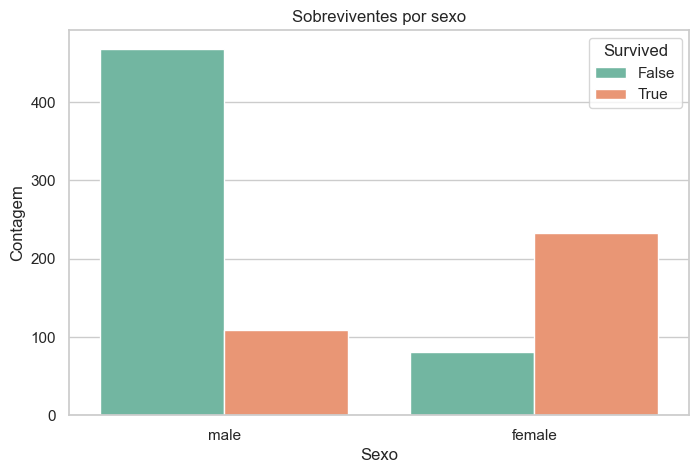

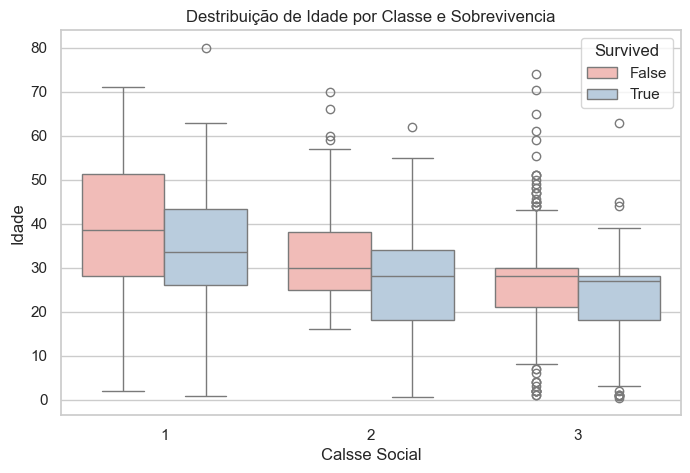

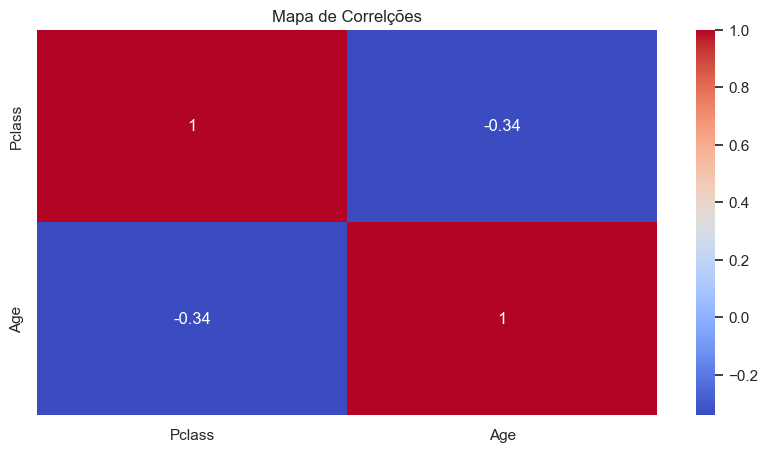

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

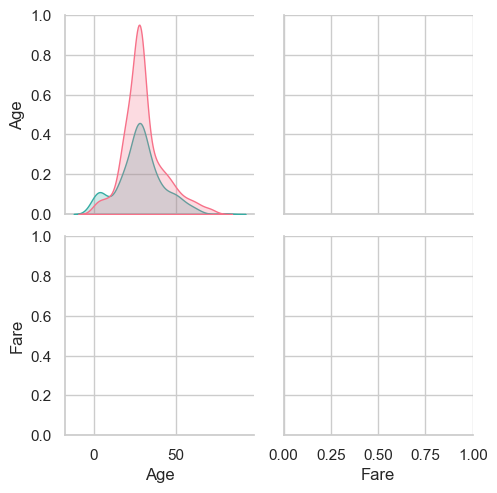

In [11]:
#4

#grafico 1

sns.set(style='whitegrid')

plt.figure(figsize = (8,5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Sobreviventes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

#grafico 2

plt.figure(figsize = (8,5))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Pastel1')
plt.title('Destribuição de Idade por Classe e Sobrevivencia')
plt.xlabel('Calsse Social')
plt.ylabel('Idade')
plt.show()

#Grafico 3

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlções')
plt.show()

# Grafico 4

sns.pairplot(df, vars=['Age', 'Fare'], hue='Survived' , palette='husl')
plt.suptitle('Relações entre Idade, Tarifa e Sobrevivencia')
plt.show()